### Modelagem de algoritmo: Cancelamento iterativo da SSBI



Para a modelagem, adota-se as seguintes variáveis:

$$
\begin{aligned}
U_{1}        &= \frac{R_{1} - A^{2}}{4A^{2}} \\
U_{2}        &= \frac{R_{2} - A^{2}}{4A^{2}} \\
\overline{I}   &= \frac{I}{2A} \ e \ \overline{Q} = \frac{Q}{2A} \therefore \overline{Signal} = \overline{I} + j\overline{Q} = \frac{1}{2A}(I+jQ) = \frac{1}{2A}Signal   \\
\end{aligned}
$$

Com a mudança das variáveis, obtém-se as equações:

$$
\left\{\begin{matrix}
R_{1} = A^{2} + I^{2} + Q^{2} + 2AI \\
R_{2} = A^{2} + I^{2} + Q^{2} + 2AQ
\end{matrix}\right.
$$

$$
\left\{\begin{matrix}
R_{1} - A^{2} = I^{2} + Q^{2} + 2AI \ \ (\div \ 4A^{2}) \\
R_{2} - A^{2} = I^{2} + Q^{2} + 2AQ \ \ (\div \ 4A^{2})
\end{matrix}\right.
$$

$$
\left\{\begin{matrix}
U_{1} = \overline{I}^{2} + \overline{Q}^{2} + \overline{I} \\
U_{2} = \overline{I}^{2} + \overline{Q}^{2} + \overline{Q}
\end{matrix}\right.
$$

Como estimativa inicial para a equação acima, definimos que:

$$
\begin{equation*}
\overline{I}_{(0)} = U_{1} - \frac{P}{4A^{2}}; \ \ \ \ \ \overline{Q}_{(0)} = U_{2} - \frac{P}{4A^{2}}
\end{equation*}
$$

Em que, a estimativa do erro inicial é calculado como:

$$
\begin{equation*}
\Delta \overline{I}_{(0)} = \overline{I}_{(0)} - \overline{I} = \overline{I}^{2} + \overline{Q}^{2} - \frac{P}{4A^{2}}
\end{equation*}
$$

Portanto, para determinar a SSBI e reduzir os erros de estimativa, as iterações do algoritmo são definidas por:

$$
\left\{\begin{matrix}
\overline{I}_{(n+1)} = U_{1} - \left(\overline{I}_{(n)}^{2} + \overline{Q}_{(n)}^{2} \right) \\
\overline{Q}_{(n+1)} = U_{2} - \left(\overline{I}_{(n)}^{2} + \overline{Q}_{(n)}^{2} \right)
\end{matrix}\right.
$$

Em que, o erro de estimação é definido como:

$$
\left\{\begin{matrix}
\Delta \overline{I}_{(n+1)} = - \Delta \overline{I}_{(n)} \left(\overline{I} + \overline{Q} + \overline{I}_{(n)} + \overline{Q}_{(n)}\right) = -2\Delta \overline{I}_{(n)} \left(\Delta \overline{I}_{(n)} +  \overline{I} + \overline{Q}\right) \\
\\
\Delta \overline{Q}_{(n)} = \Delta \overline{I}_{(n)}
\end{matrix}\right.
$$

O sucesso da estimação do algoritmo (convergência) implica que $|\Delta \overline{I}_{(n)}| \rightarrow 0$ quando $n \rightarrow \infty$ 


#### Espectro de soluções do algoritmo

Para amostras aleatórias $(\overline{I}$, $\overline{Q})$ com condição inicial $\Delta \overline{I}_{(0)} + \overline{I} + \overline{Q} \leq \frac{1}{2} + \left| \overline{I} + \overline{Q} + \frac{1}{2} \right|$:

* $|\Delta \overline{I}_{(n)}| \rightarrow 0 \Rightarrow$ IC converge e remove totalmente a SSBI;
* $|\Delta \overline{I}_{(n)}| \rightarrow n_{1}; \ n_{1}\neq 0  \Rightarrow$ IC converge para solução errada;
* $|\Delta \overline{I}_{(n)}| \rightarrow a<n<b; \Rightarrow$ IC assume diversos valores em um intervalo fixo;


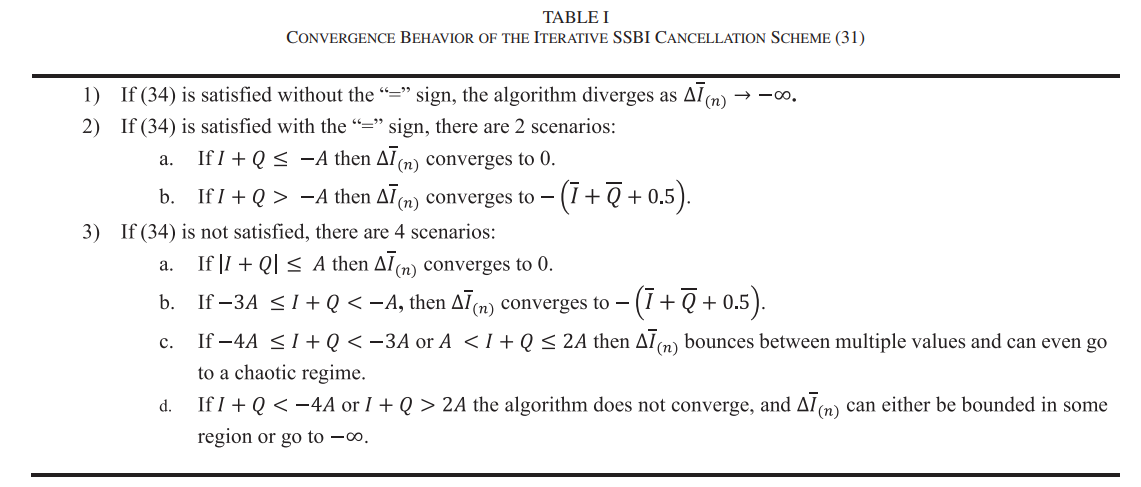

[REF]: LE, S. T.; AREF, V.; CHO, J. Single-Ended Coherent Receiver, Journal of Lightwave Technology, 2022, v. 40, n. 5, p. 1382-1399.

In [ ]:
from optic.metrics import signal_power

def IC(R1, R2, sigWDM, sigLO, N=20):
    """
    Iterative SSBI Cancellation (IC)

    :param R1 and R2: ouput of SER [nparray]
    :param sigWDM: received signal [nparray]
    :param sigLO: local oscillator (LO) [nparray]
    :param N: number of iterations [scalar]
    
    :return sigOut: the inphase and quadrature components of the optical field [nparray]
    """
    
    A = sigLO                # Oscilador Local 
    P = signal_power(sigWDM) # Potência do sinal recebido
    
    U1 = (R1 - A**2) / (4*A**2) # Definindo U1 (Mudança de Variável)
    U2 = (R2 - A**2) / (4*A**2) # Definindo U2 (Mudança de Variável)
    
    overline_I = sigWDM.real / (2*A) # Define nova variável I
    overline_Q = sigWDM.imag / (2*A) # Define nova variável Q
    
    overline_I0 = U1 - P / (4*A**2) # Estimativa Inicial de I
    overline_Q0 = U2 - P / (4*A**2) # Estimativa Inicial de Q
    e0 = overline_I0 - overline_I   # Estimativa Inicial do erro estimado
    
    # Inicializando variáveis de iteração
    overline_In = overline_I0 # I(n) = I(0)
    overline_Qn = overline_Q0 # Q(n) = Q(0)
    error = e0                # ▲I(n) = ▲I(0)
    
    # Iteração do algoritmo
    for nSteps in range(1, N): # Loop de N laços
        reductionSSBI  = (overline_In**2 + overline_Qn**2)      # Cálculo da iteração da SSBI
        
        overline_Inext = U1 - reductionSSBI                     # Cálculo do valor de I(n+1)
        overline_Qnext = U2 - reductionSSBI                     # Cálculo do valor de Q(n+1)
        
        errorNext = - error * (overline_I + overline_Q + overline_In + overline_Qn) # Cálculo do valor de ▲I(n+1)
             
        overline_In = overline_Inext # Atualiza I(n+1) para I(n)
        overline_Qn = overline_Qnext # Atualiza Q(n+1) para Q(n)
        error = errorNext            # Atualiza ▲I(n+1) para ▲I(n)
    
    overline_sigOut = (overline_In + 1j*overline_Qn) # estimation signal
    sigOut = (2*A) * overline_sigOut                 # recovered signal w/ SSBI cancellation
    
    return sigOut